# Insertion sort

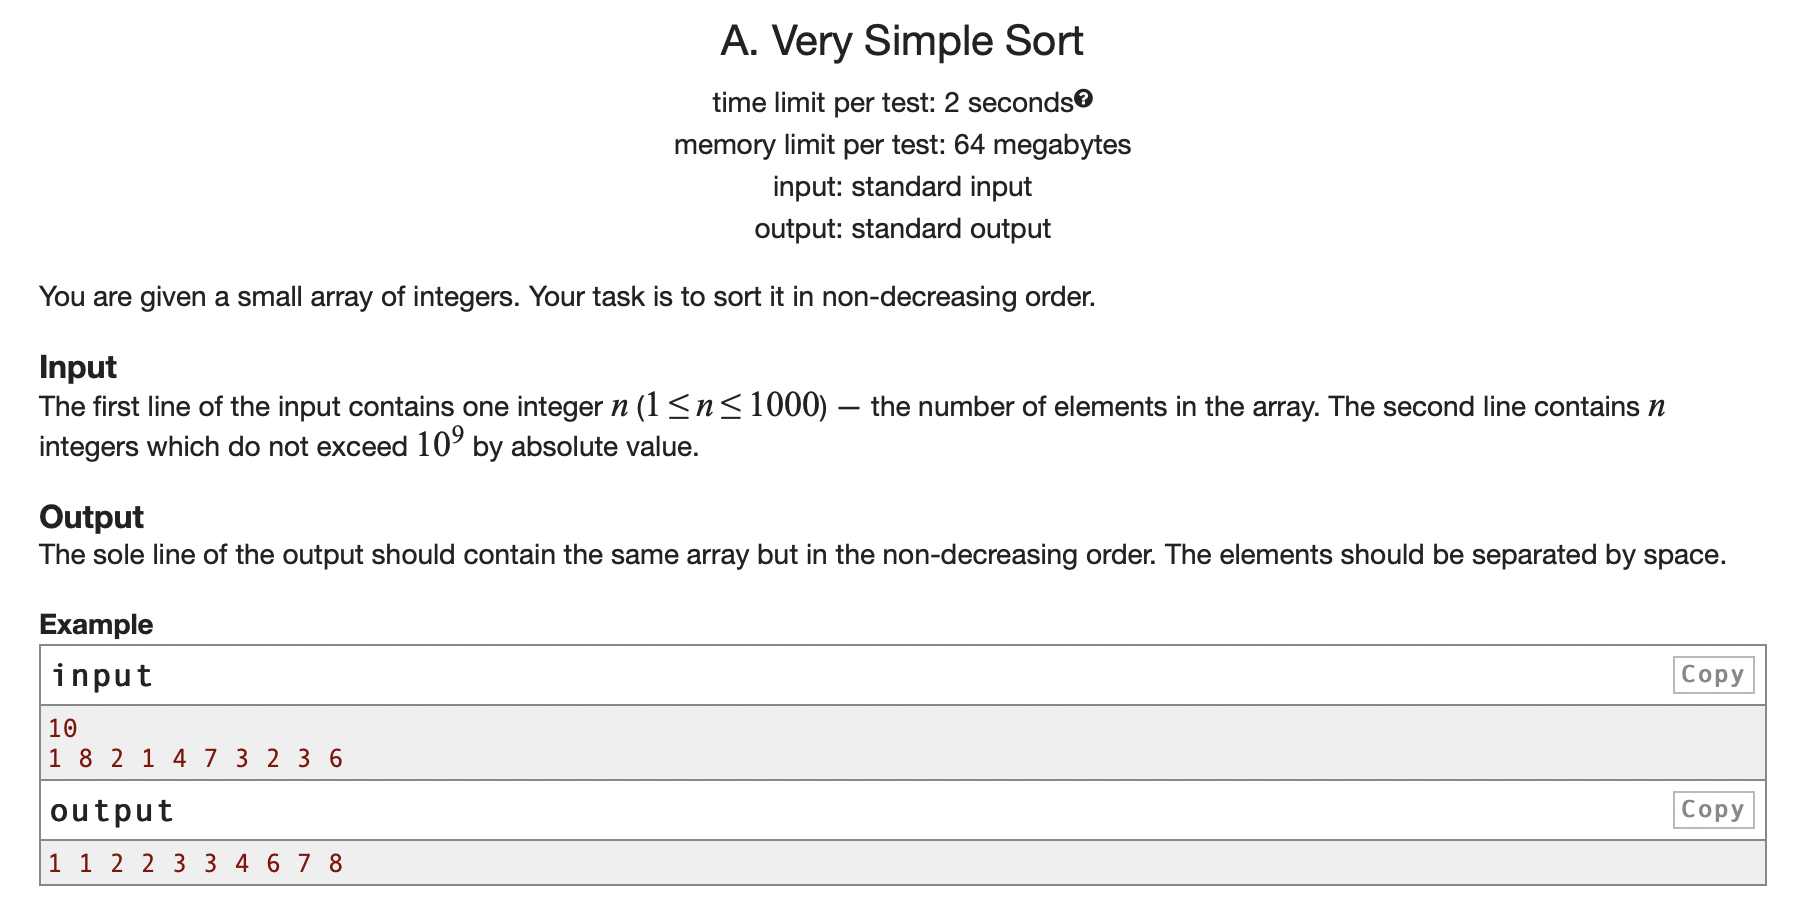

In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i
        while j > 0 and arr[j - 1] > arr[j]:
            arr[j - 1], arr[j] = arr[j], arr[j - 1]
            j -= 1
    return arr

_ = input()
arr = list(map(int, input().split()))
print(*insertion_sort(arr))

# Merge sort

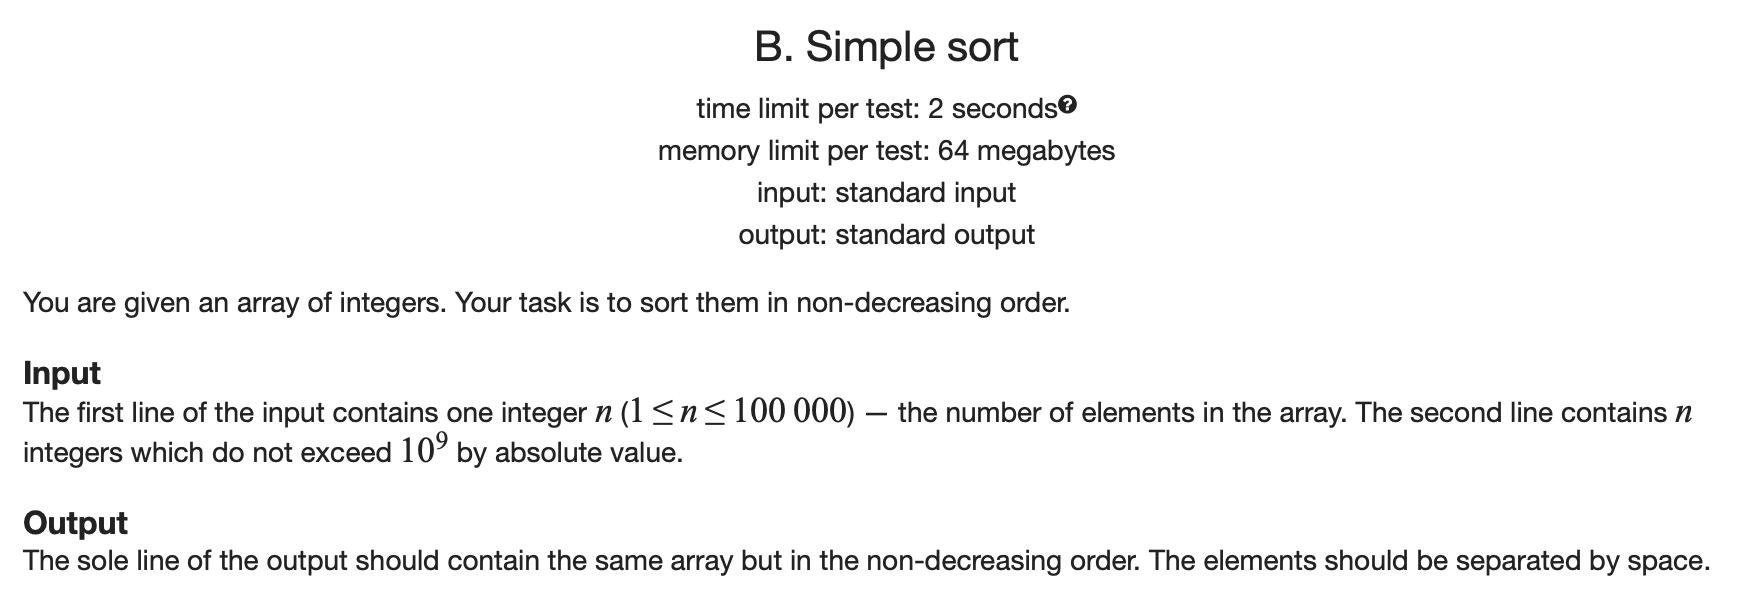

In [ ]:
def merge(arr1, arr2):
    arr1_len = len(arr1)
    arr2_len = len(arr2)
    i = 0
    j = 0
    merged_arr = []
    while i + j < arr1_len + arr2_len:
        if j == arr2_len:
            merged_arr.extend(arr1[i:])
            break
        elif i == arr1_len:
            merged_arr.extend(arr2[j:])
            break
        elif arr1[i] < arr2[j]:
            merged_arr.append(arr1[i])
            i += 1
        else:
            merged_arr.append(arr2[j])
            j += 1
    return merged_arr


def merge_sort(arr):
    n = len(arr)
    if n == 1:
        return arr
    l = arr[:n//2]
    r = arr[n//2:]
    l = merge_sort(l)
    r = merge_sort(r)
    return merge(l, r)


_ = input()
arr = list(map(int, input().split()))
print(*merge_sort(arr))

# Merge sort. Number of inversions

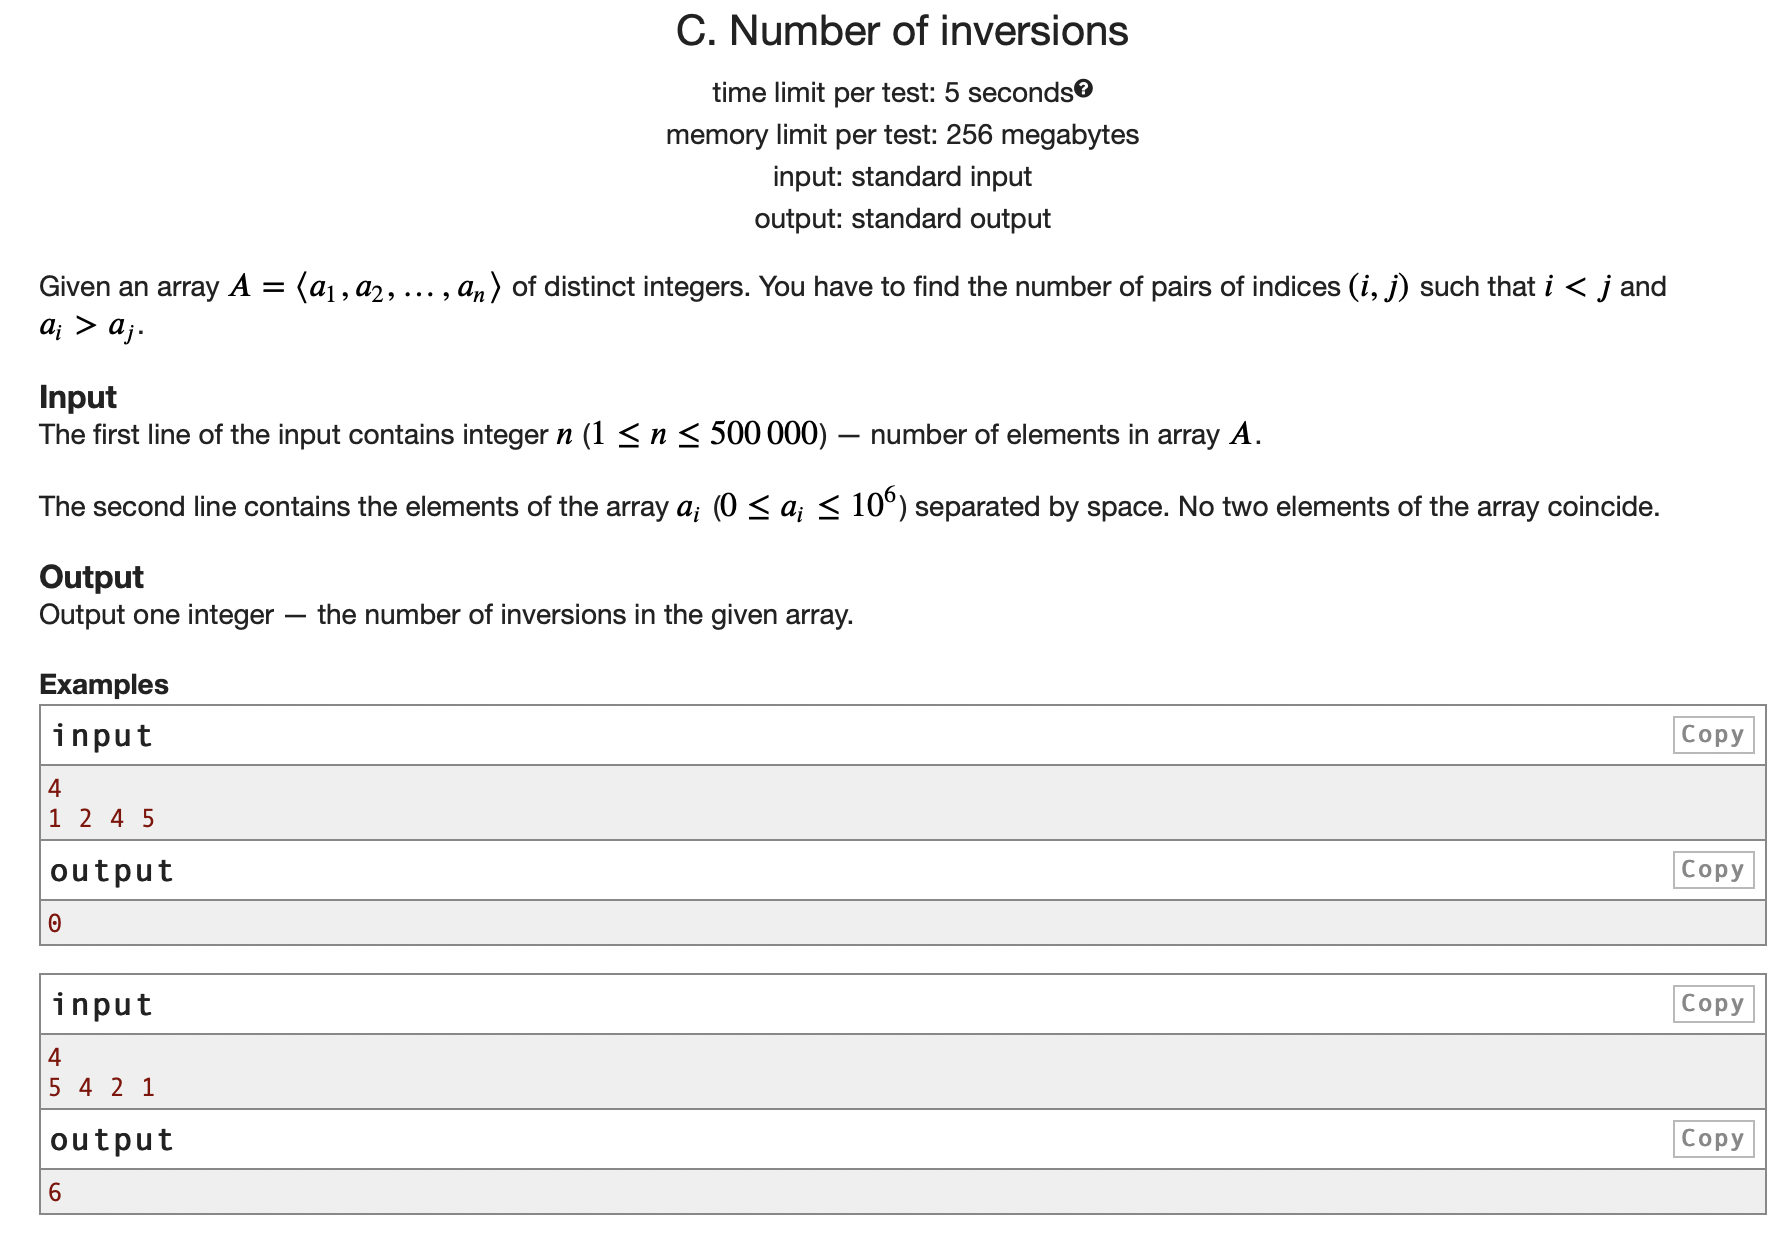

In [ ]:
def merge_inversions(arr1, arr2, inversions):
    arr1_len = len(arr1)
    arr2_len = len(arr2)
    i = 0
    j = 0
    merged_arr = []
    while i + j < arr1_len + arr2_len:
        if j == arr2_len:
            merged_arr.extend(arr1[i:])
            break
        elif i == arr1_len:
            merged_arr.extend(arr2[j:])
            break
        elif arr1[i] < arr2[j]:
            merged_arr.append(arr1[i])
            i += 1
        else:
            merged_arr.append(arr2[j])
            inversions += (arr1_len - i)
            j += 1
    return merged_arr, inversions


def merge_sort_inversions(arr):
    n = len(arr)
    if n == 1:
        return arr, 0
    l = arr[:n//2]
    r = arr[n//2:]
    l, li = merge_sort_inversions(l)
    r, ri = merge_sort_inversions(r)
    inversions = li + ri
    return merge_inversions(l, r, inversions)


_ = input()
arr = list(map(int, input().split()))
print(merge_sort_inversions(arr)[1])

# Quicksort

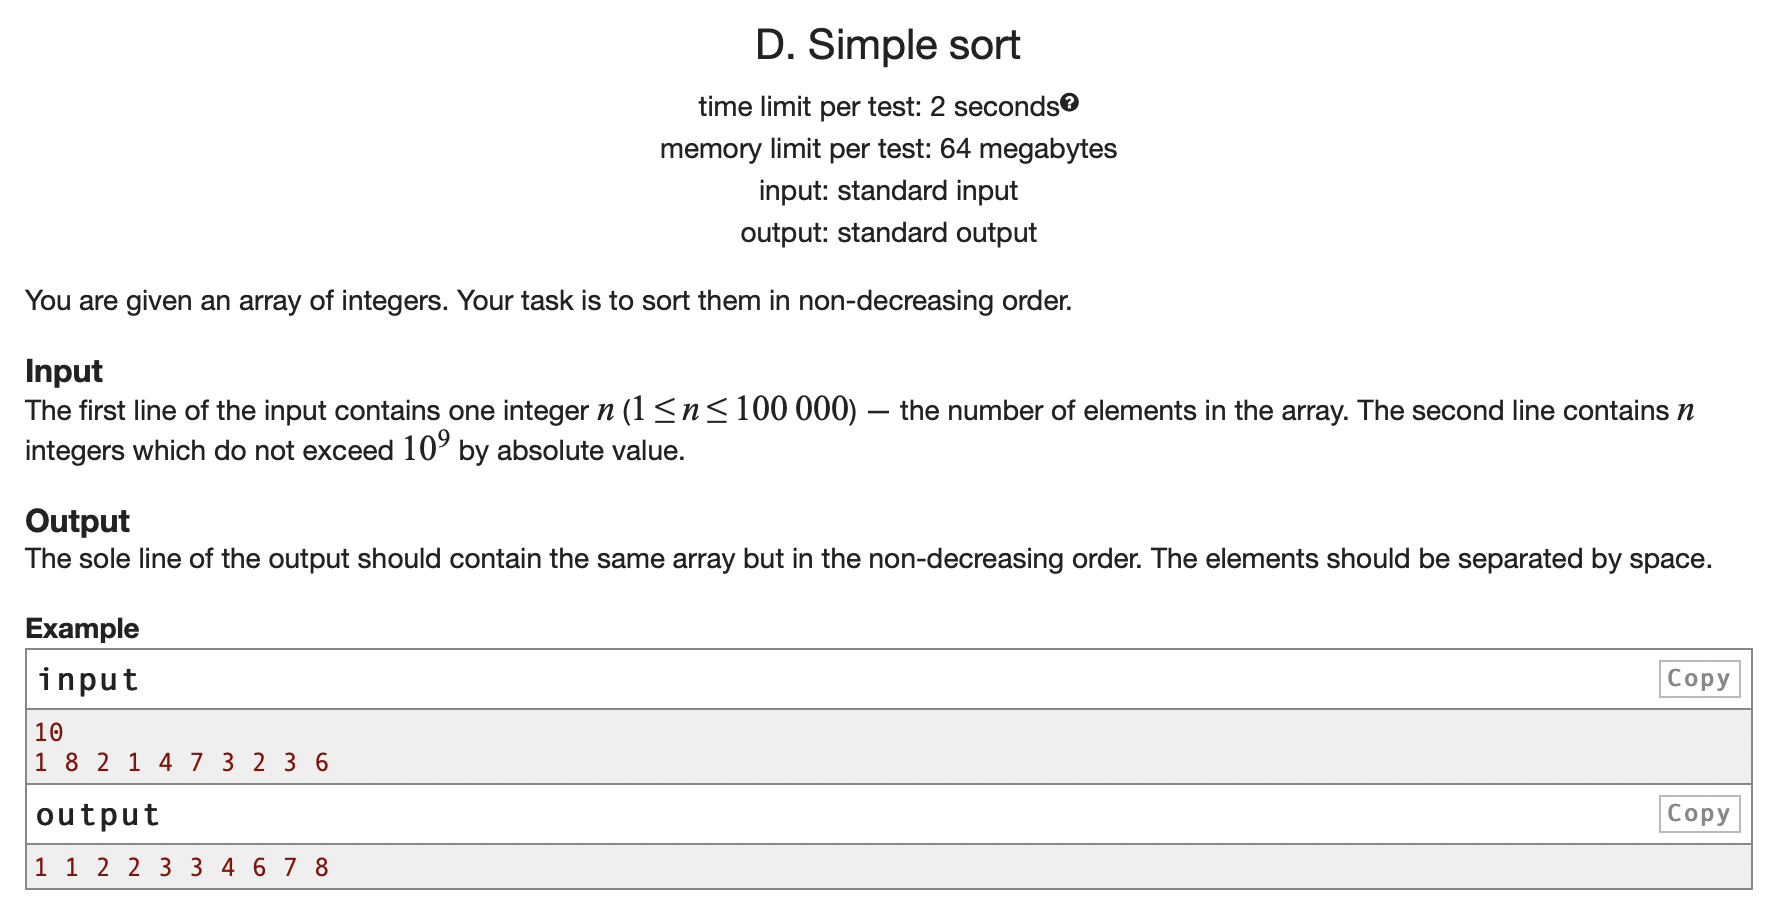

In [ ]:
import random
def split(arr, l, r, x):
    m1 = l
    i = l
    m2 = r - 1
    while i <= m2:
        if arr[i] < x:
            arr[m1], arr[i] = arr[i], arr[m1]
            m1 += 1
            i += 1
        elif arr[i] > x:
            arr[i], arr[m2] = arr[m2], arr[i]
            m2 -= 1
        else:
            i += 1
    return m1, m2


def qsort(arr, l, r):
    if r - l <= 1:
        return
    x = random.choice(arr[l:r])
    m1, m2 = split(arr, l, r, x)
    qsort(arr, l, m1)
    qsort(arr, m2 + 1, r)


_ = input()
arr = list(map(int, input().split()))
qsort(arr, 0, len(arr))
print(*arr)

In [ ]:
*a, b = "a b c".split()

In [ ]:
a

# King sort

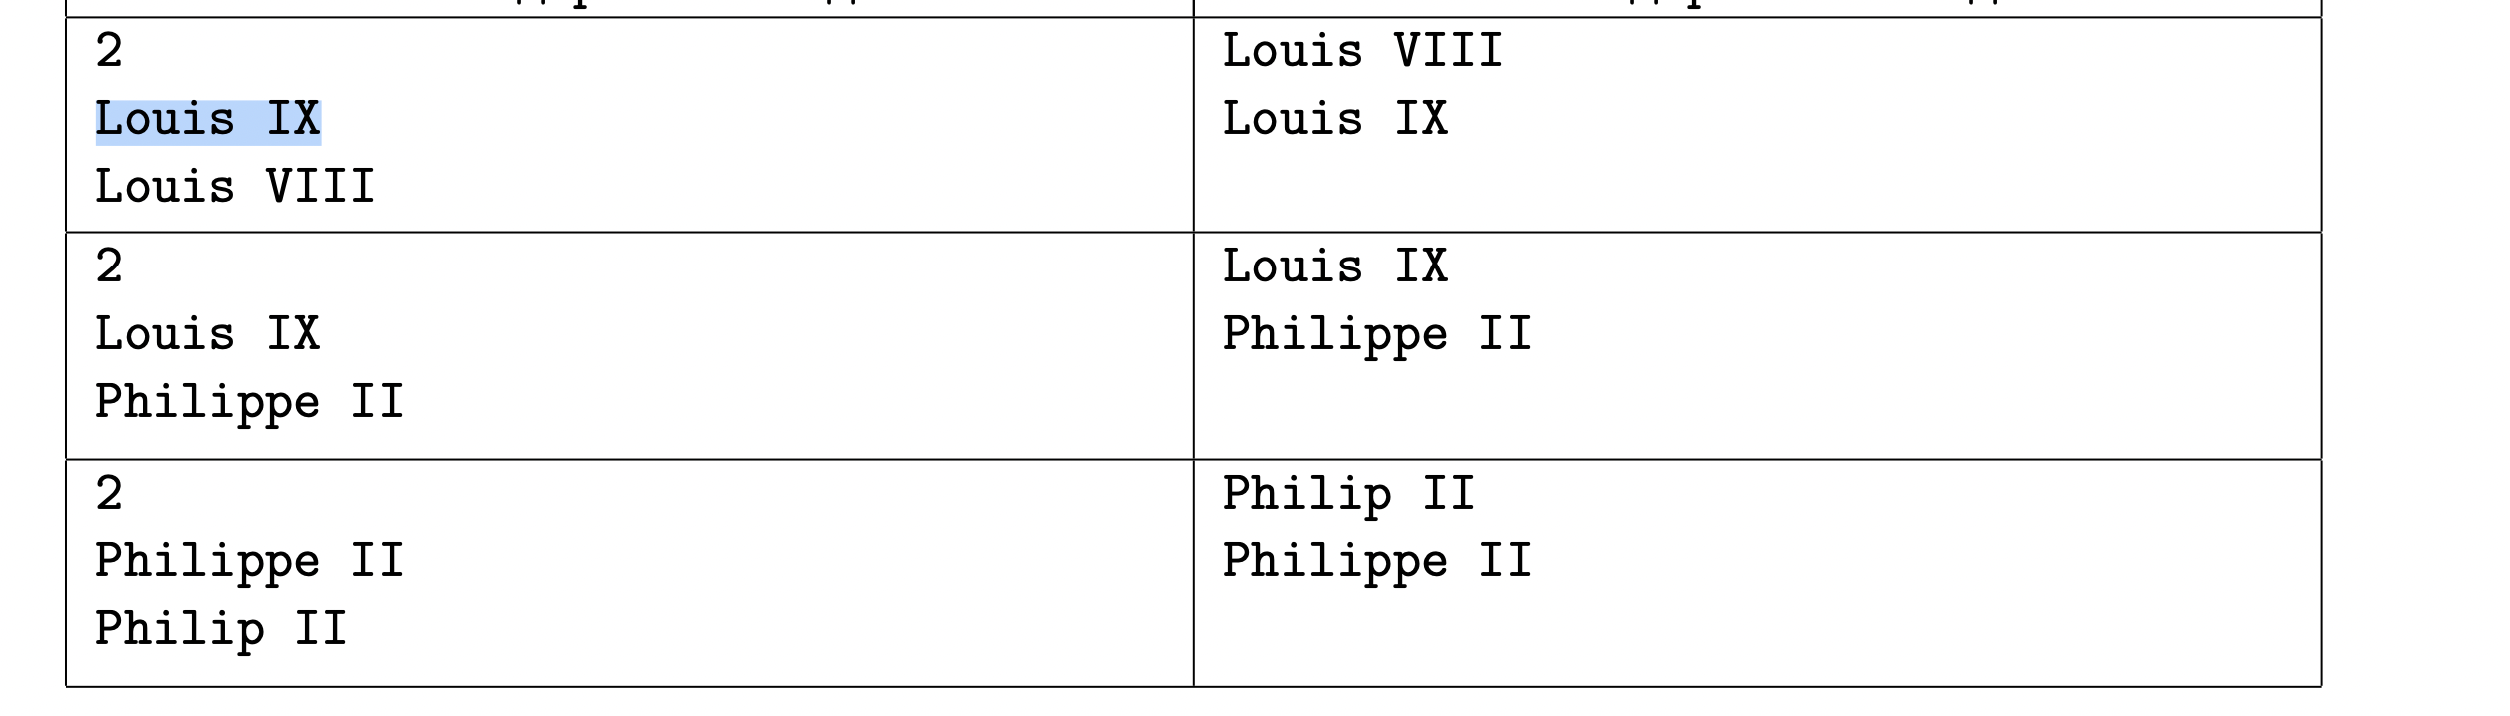

In [ ]:
class KingSort():
    def __init__(self, names):
        self.dict_names = self.parse_names(names)
    
    def parse_names(self, names):
        rom_val = {'I': 1, 'V': 5, 'X': 10, 'L': 50}
        dict_names = dict()
        for name in names:
            *roman_name, roman_number = name.split()
            int_val = 0
            for i in range(len(roman_number)):
                if i > 0 and rom_val[roman_number[i]] > rom_val[roman_number[i - 1]]:
                    int_val += rom_val[roman_number[i]] - 2 * rom_val[roman_number[i - 1]]
                else:
                    int_val += rom_val[roman_number[i]]
            dict_names[name] = {'name': ' '.join(roman_name), 'order': int_val}
        return dict_names
    
    def sort_names(self):
        return sorted(self.dict_names, key=lambda x: (self.dict_names[x]['name'], self.dict_names[x]['order']))


n = int(input())
arr = [input() for _ in range(n)]
Kings = KingSort(arr)
print("\n".join(Kings.sort_names()))